# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [11]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

<AxesSubplot:>

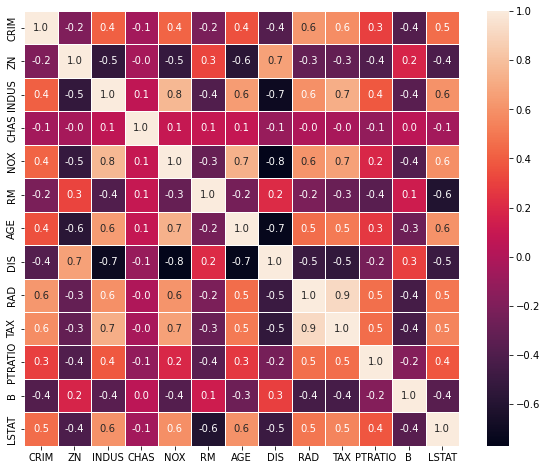

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), square=True, annot=True, linewidth=.5, fmt='.1f')

DIS, ZN, INDUS, LSTAT parecem variáveis explicativas promissoras para o modelo preditivo.

### 3. Separe os dados em validação e teste

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [22]:
dt_reg1 = DecisionTreeRegressor(max_depth=8, random_state=333)
dt_reg2 = DecisionTreeRegressor(max_depth=2, random_state=444)

dt_reg1.fit(X_train, y_train)
dt_reg2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=444)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [27]:
mse1_train = dt_reg1.score(X_train, y_train)
mse1_test = dt_reg1.score(X_test, y_test)
mse2_train = dt_reg2.score(X_train, y_train)
mse2_test = dt_reg2.score(X_test, y_test)

template = "MSE da árvore com profundidade={0} é: {1:.2f}"

print('Primeira árvore')
print('Treino 1: '+ template.format(dt_reg1.get_depth(),mse1_train).replace(".",","))
print('Teste 1: '+ template.format(dt_reg1.get_depth(),mse1_test).replace(".",","))

print('Segunda árvore')
print('Treino 2: '+ template.format(dt_reg2.get_depth(),mse2_train).replace(".",","))
print('Teste 2: '+ template.format(dt_reg2.get_depth(),mse2_test).replace(".",","))

Primeira árvore
Treino: MSE da árvore com profundidade=8 é: 0,98
Teste: MSE da árvore com profundidade=8 é: 0,51
Segunda árvore
Treino: MSE da árvore com profundidade=2 é: 0,73
Teste: MSE da árvore com profundidade=2 é: 0,56


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore de treino 1 a primeira vista parece excelente, mas quando usada no teste percebemos overfitting.

Sendo assim, a árvore mais promissora e que traz bons resultados no treino e teste é a com profundidade 2.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

[Text(334.8, 362.4, 'RM <= 6.978\nmse = 86.229\nsamples = 379\nvalue = 22.452'),
 Text(167.4, 217.44, 'LSTAT <= 14.395\nmse = 40.927\nsamples = 328\nvalue = 19.91'),
 Text(83.7, 72.47999999999996, 'mse = 24.298\nsamples = 196\nvalue = 23.406'),
 Text(251.10000000000002, 72.47999999999996, 'mse = 20.514\nsamples = 132\nvalue = 14.718'),
 Text(502.20000000000005, 217.44, 'RM <= 7.437\nmse = 68.697\nsamples = 51\nvalue = 38.802'),
 Text(418.5, 72.47999999999996, 'mse = 29.605\nsamples = 28\nvalue = 32.804'),
 Text(585.9, 72.47999999999996, 'mse = 19.16\nsamples = 23\nvalue = 46.104')]

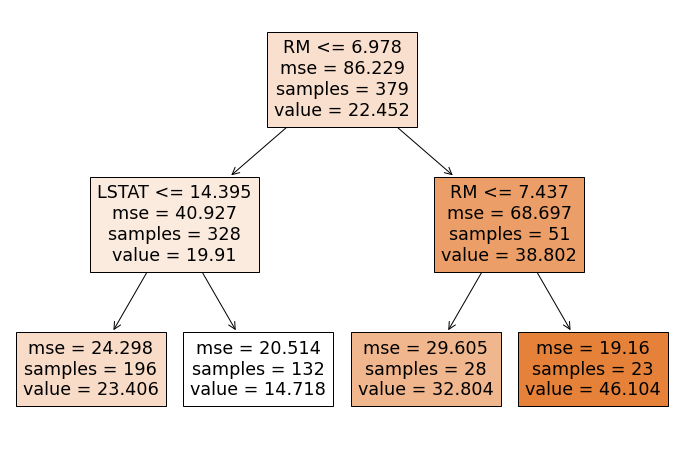

In [28]:
plt.figure(figsize=(12,8))

tree.plot_tree(dt_reg2, feature_names=X.columns, filled=True)